<a href="https://colab.research.google.com/github/Muhammad-Saad-Ali5491/Machine-Learning-Activity/blob/main/Class_Activity(Machine_learning)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Class Activity**
##**Names**

###SaffiSardar **[F2022266742]**
### Muhammad Saad Ali **[F2022266790]**



### Step 1: Importing Required Libraries

In this step, we import all the necessary Python libraries for machine learning and data visualization.  
- **NumPy** and **Pandas** are used for numerical and tabular data manipulation.  
- **Matplotlib** and **Seaborn** help us visualize data and results through plots and graphs.  
- **Scikit-learn (sklearn)** provides tools for preprocessing, regression modeling, and evaluation.  
- **Joblib** is used for model persistence — saving and loading trained models later.


In [ ]:
# Core packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn import preprocessing, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Saving model
import joblib


### Step 2: Loading the Dataset

We download and load the *Housing Prices* dataset from Kaggle.  
This dataset contains various attributes such as area, bedrooms, bathrooms, and location indicators used to predict house prices.  

We then display the first few rows to get a sense of the dataset’s structure and features.


In [ ]:
import kagglehub

# Download dataset from Kaggle
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")
print("Path to dataset:", path)

# Load CSV file
data = pd.read_csv(path + "/Housing.csv")
data.head()


Using Colab cache for faster access to the 'housing-prices-dataset' dataset.
Path to dataset: /kaggle/input/housing-prices-dataset


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Step 3: Exploring and Understanding the Data

Before training our model, we explore the dataset to:
- Check for missing values and data types.
- Understand the statistical summary of each feature.
- Visualize correlations using a **heatmap** to identify relationships between numerical features.
- Use **pairplots** to observe how different features relate to the target variable (price).  

This step helps identify which features are most likely to influence the output.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mea

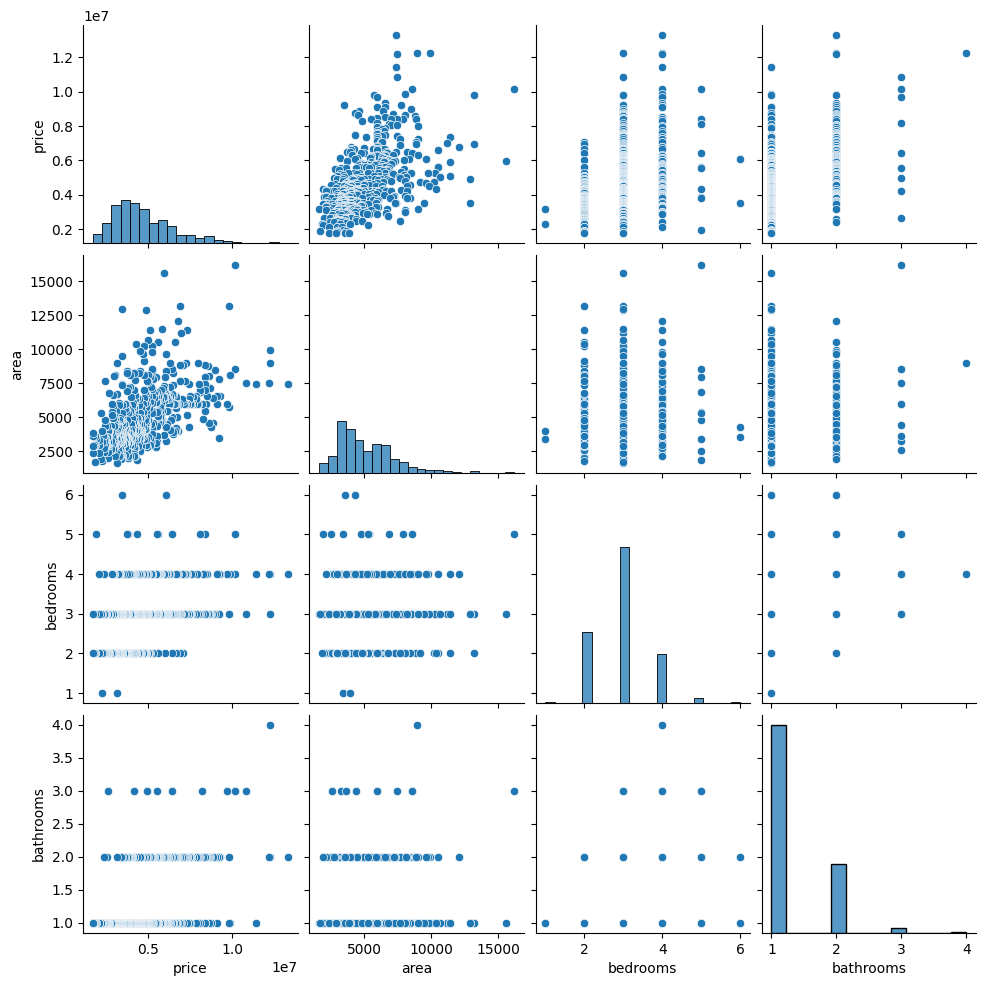

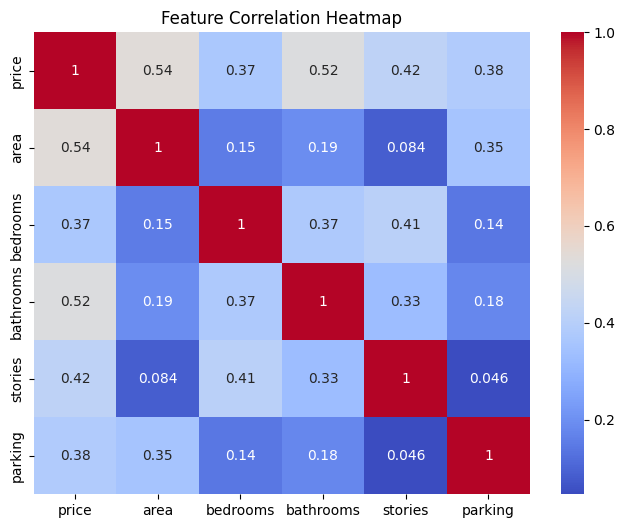

In [ ]:
print(data.info())
print(data.describe())
print(data.isnull().sum())

# Pairplot & Correlation
sns.pairplot(data[['price', 'area', 'bedrooms', 'bathrooms']])
plt.show()

plt.figure(figsize=(8,6))
# Select only numeric columns for correlation heatmap
numeric_data = data.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

### Step 4: Data Preprocessing Techniques

In real-world datasets, preprocessing is a crucial step before feeding data into a model.  
We will apply several preprocessing methods using **`sklearn.preprocessing`**:

1. **Mean Removal (Standardization):** Centers data by removing the mean.
2. **Min-Max Scaling:** Scales features between a fixed range (0, 1).
3. **Normalization:** Adjusts values so they share a common scale without distorting differences.
4. **Binarization:** Converts numerical values to binary form based on a threshold.
5. **One-Hot Encoding:** Converts categorical columns into binary dummy variables.
6. **Label Encoding:** Converts categorical labels (e.g., words like “yes/no”) into numeric form.

These transformations help the model interpret data consistently and improve performance.


In [ ]:
from sklearn.preprocessing import scale

numeric_data = data[['area', 'bedrooms', 'bathrooms']]
standardized = scale(numeric_data)

print("Mean =", standardized.mean(axis=0))
print("Std Dev =", standardized.std(axis=0))


Mean = [-1.56449777e-16 -1.82524739e-16 -2.60749628e-17]
Std Dev = [1. 1. 1.]


In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(numeric_data)
print("\nScaled Data (0–1 range):\n", scaled[:5])



Scaled Data (0–1 range):
 [[0.39656357 0.6        0.33333333]
 [0.5024055  0.6        1.        ]
 [0.57113402 0.4        0.33333333]
 [0.40206186 0.6        0.33333333]
 [0.39656357 0.6        0.        ]]


In [ ]:
normalized = preprocessing.normalize(numeric_data, norm='l1')
print("\nL1 Normalized Data:\n", normalized[:5])



L1 Normalized Data:
 [[9.99192028e-01 5.38647994e-04 2.69323997e-04]
 [9.99107939e-01 4.46030330e-04 4.46030330e-04]
 [9.99498244e-01 3.01053688e-04 2.00702459e-04]
 [9.99200639e-01 5.32907008e-04 2.66453504e-04]
 [9.99326599e-01 5.38720539e-04 1.34680135e-04]]


In [ ]:
binarizer = preprocessing.Binarizer(threshold=1500)
binarized = binarizer.fit_transform(numeric_data)
print("\nBinarized Data:\n", binarized[:5])



Binarized Data:
 [[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [ ]:
encoded = pd.get_dummies(data[['mainroad', 'guestroom', 'basement', 'furnishingstatus']], drop_first=True)
encoded.head()


,mainroad_yes,guestroom_yes,basement_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,True,False,False,False,False
1,True,False,False,False,False
2,True,False,True,True,False
3,True,False,True,False,False
4,True,True,True,False,False


In [ ]:
le = preprocessing.LabelEncoder()
data['prefarea_encoded'] = le.fit_transform(data['prefarea'])
print("\nLabel Encoding Mapping:")
for i, cls in enumerate(le.classes_):
    print(cls, "→", i)



Label Encoding Mapping:
no → 0
yes → 1



### Step 5: Preparing the Final Dataset for Modeling

Now that data is preprocessed, we combine the numeric and encoded categorical features into a single DataFrame.  
We separate:
- **X (features)** → independent variables used for prediction.  
- **y (target)** → the dependent variable (house price).

We then split the dataset into **training (80%)** and **testing (20%)** sets using `train_test_split`.  
The model will learn from the training set and be evaluated on the test set.


In [ ]:
# Combine numeric and encoded categorical features
final_df = pd.concat([data[['price', 'area', 'bedrooms', 'bathrooms', 'stories']], encoded, data['prefarea_encoded']], axis=1)
X = final_df.drop('price', axis=1)
y = final_df['price']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (436, 10)
Testing shape: (109, 10)


### Step 6: Building and Training a Linear Regression Model

Linear Regression is one of the simplest and most powerful regression techniques.  
It assumes a linear relationship between the independent variables and the target variable.  

In this step:
- We train a linear model using the training data.
- Plot the predicted vs actual prices for both training and test sets.  

These scatter plots help us visually check how well our regression line fits the data.


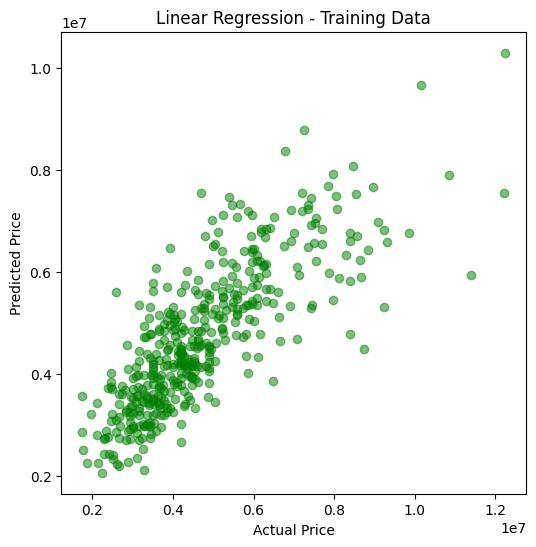

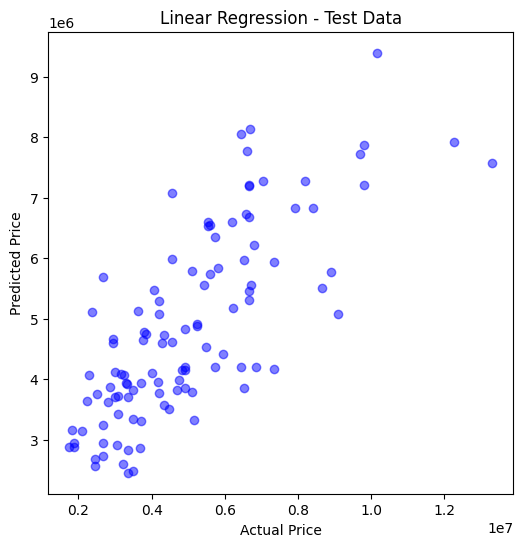

In [ ]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

# Training Visualization
plt.figure(figsize=(6,6))
plt.scatter(y_train, lin_reg.predict(X_train), color='green', alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression - Training Data")
plt.show()

# Testing Visualization
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression - Test Data")
plt.show()


### Step 7: Evaluating Model Accuracy

To measure how well our regression model performs, we use common evaluation metrics:

- **Mean Absolute Error (MAE):** Average absolute difference between actual and predicted values.
- **Mean Squared Error (MSE):** Average squared difference — penalizes larger errors more.
- **Median Absolute Error:** More robust against outliers.
- **Explained Variance Score (EVS):** Measures how well our model explains data variation.
- **R² Score (Coefficient of Determination):** Indicates how well predictions approximate actual outcomes.

A good regression model has **low MAE/MSE** and **high R²/EVS** values.


In [ ]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Median Absolute Error:", metrics.median_absolute_error(y_test, y_pred))
print("Explained Variance Score:", metrics.explained_variance_score(y_test, y_pred))
print("R2 Score:", metrics.r2_score(y_test, y_pred))


Mean Absolute Error: 1111258.0488600521
Mean Squared Error: 2157950661900.203
Median Absolute Error: 917114.4752313057
Explained Variance Score: 0.577650218757725
R2 Score: 0.5730694091244761


### Step 8: Building a Ridge Regression Model

Ridge Regression is a type of linear regression that includes a regularization term.  
This helps prevent **overfitting** and reduces the impact of **outliers** by adding a penalty to large coefficient values.

We compare Ridge Regression’s performance to standard Linear Regression using the same metrics (MAE, MSE, R²).


Ridge MAE: 1110552.7743617836
Ridge MSE: 2156877153397.7144
Ridge R2: 0.5732817928584368


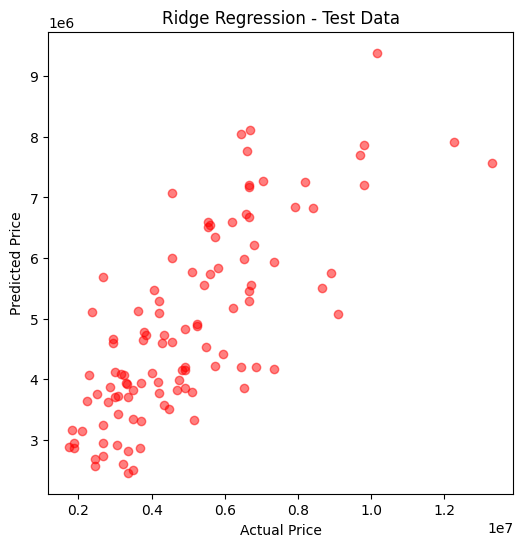

In [ ]:
ridge = linear_model.Ridge(alpha=0.5)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("Ridge MAE:", metrics.mean_absolute_error(y_test, y_pred_ridge))
print("Ridge MSE:", metrics.mean_squared_error(y_test, y_pred_ridge))
print("Ridge R2:", metrics.r2_score(y_test, y_pred_ridge))

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_ridge, color='red', alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Ridge Regression - Test Data")
plt.show()


### Step 9: Building a Polynomial Regression Model

Polynomial Regression allows us to capture **non-linear relationships** between the features and the target variable.  
We use `PolynomialFeatures` to transform input data into polynomial form and fit a linear model to it.  

By increasing the polynomial degree, the model can fit curves rather than straight lines, improving accuracy for non-linear datasets.  
However, higher degrees can also lead to overfitting, so a balance is needed.


Polynomial MAE: 1357010.6202846782
Polynomial MSE: 3639047785781.1533
Polynomial R2: 0.2800480340733279


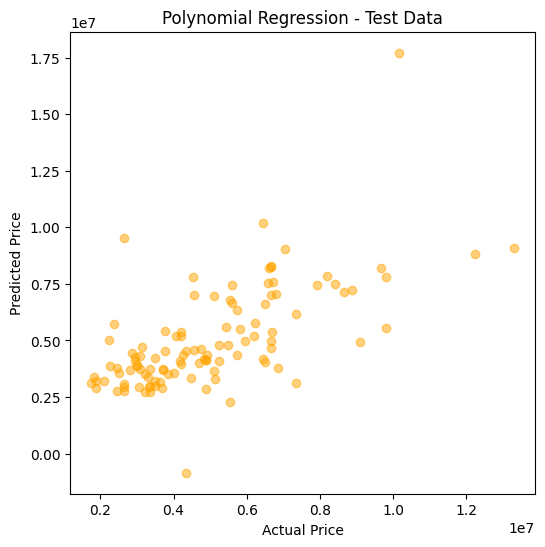

In [ ]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = linear_model.LinearRegression()
poly_model.fit(X_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

print("Polynomial MAE:", metrics.mean_absolute_error(y_test, y_pred_poly))
print("Polynomial MSE:", metrics.mean_squared_error(y_test, y_pred_poly))
print("Polynomial R2:", metrics.r2_score(y_test, y_pred_poly))

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_poly, color='orange', alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Polynomial Regression - Test Data")
plt.show()


### Step 10: Saving and Loading (Model Persistence)

After training, we save our model using **Joblib** so it can be reused later without retraining.  

This process is called **model persistence**:
- `joblib.dump()` saves the trained model to a file.
- `joblib.load()` loads it back into memory.

We verify the saved model by reloading it and confirming it produces identical predictions and metrics.


In [ ]:
joblib.dump(lin_reg, "linear_regression_model.pkl")
loaded_model = joblib.load("linear_regression_model.pkl")

# Verify it gives same prediction
y_test_pred_new = loaded_model.predict(X_test)
print("\nVerification MSE (Loaded Model):", metrics.mean_squared_error(y_test, y_test_pred_new))



Verification MSE (Loaded Model): 2157950661900.203


### Step 11: Analyzing Feature Importance with Random Forest

To understand which features influence the target variable the most, we train a **Random Forest Regressor**.  
This ensemble model ranks each feature by how much it contributes to prediction accuracy.  

The resulting **bar graph** visualizes the relative importance of each feature — higher bars mean stronger influence on house price.


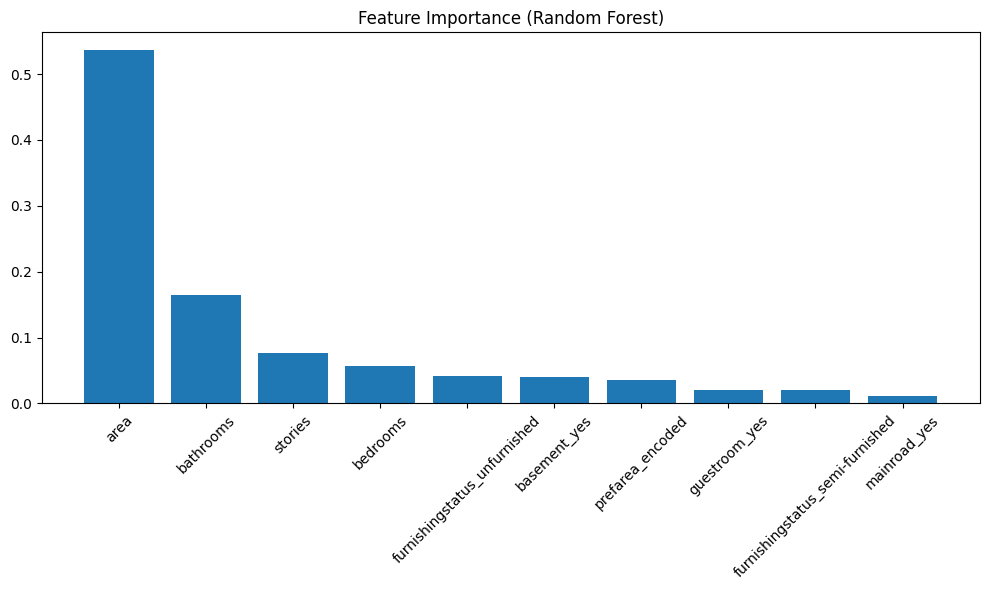

In [ ]:
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=45)
plt.tight_layout()
plt.show()


### Step 12: Model Performance Summary

In this section, we summarize all the models (Linear, Ridge, and Polynomial Regression) by comparing key metrics:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- R² Score

This table helps us quickly identify which model performed best overall.


In [ ]:
summary = pd.DataFrame({
    "Model": ["Linear", "Ridge", "Polynomial"],
    "MAE": [
        metrics.mean_absolute_error(y_test, y_pred),
        metrics.mean_absolute_error(y_test, y_pred_ridge),
        metrics.mean_absolute_error(y_test, y_pred_poly)
    ],
    "MSE": [
        metrics.mean_squared_error(y_test, y_pred),
        metrics.mean_squared_error(y_test, y_pred_ridge),
        metrics.mean_squared_error(y_test, y_pred_poly)
    ],
    "R2": [
        metrics.r2_score(y_test, y_pred),
        metrics.r2_score(y_test, y_pred_ridge),
        metrics.r2_score(y_test, y_pred_poly)
    ]
})
summary


,Model,MAE,MSE,R2
0,Linear,1.111258e+06,2.157951e+12,0.573069
1,Ridge,1.110553e+06,2.156877e+12,0.573282
2,Polynomial,1.357011e+06,3.639048e+12,0.280048


### Step 13: Model Predictions on Sample Data

We now display a few predictions from each model alongside the actual prices.  
This comparison allows us to observe how closely the models’ outputs match real data points.  
Smaller differences between actual and predicted values indicate better performance.


In [ ]:
# Display first 10 predictions vs actual prices
pred_comparison = pd.DataFrame({
    "Actual Price": y_test.values[:10],
    "Predicted (Linear)": y_pred[:10],
    "Predicted (Ridge)": y_pred_ridge[:10],
    "Predicted (Polynomial)": y_pred_poly[:10]
})
pred_comparison


,Actual Price,Predicted (Linear),Predicted (Ridge),Predicted (Polynomial)
0,4060000,5.477516e+06,5.478704e+06,5.198550e+06
1,6650000,7.210060e+06,7.200094e+06,8.276278e+06
2,3710000,3.310473e+06,3.311545e+06,3.710651e+06
3,6440000,4.207735e+06,4.211093e+06,4.191535e+06
4,2800000,3.618968e+06,3.618049e+06,3.680669e+06
5,4900000,3.848014e+06,3.852937e+06,2.846512e+06
6,5250000,4.914449e+06,4.916287e+06,4.079093e+06
7,4543000,7.084852e+06,7.074574e+06,7.799811e+06
8,2450000,2.562682e+06,2.566624e+06,3.796373e+06
9,3353000,2.823656e+06,2.824886e+06,2.982622e+06


### Step 14: Visualizing the Loss Function (Mean Squared Error)

The **loss function** measures how well the model fits the data.  
For regression, the most common loss is the **Mean Squared Error (MSE)**, which calculates the average squared difference between predicted and actual values.

Here, we plot the MSE for all models as a bar chart to visualize which model achieved the lowest loss — indicating better accuracy.


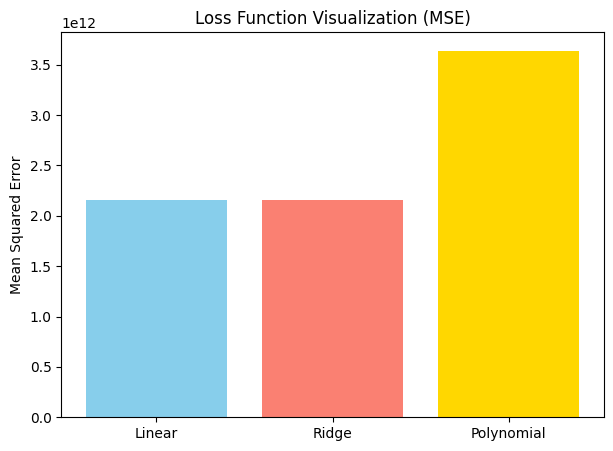

In [ ]:
mse_values = [
    metrics.mean_squared_error(y_test, y_pred),
    metrics.mean_squared_error(y_test, y_pred_ridge),
    metrics.mean_squared_error(y_test, y_pred_poly)
]
models = ["Linear", "Ridge", "Polynomial"]

plt.figure(figsize=(7,5))
plt.bar(models, mse_values, color=['skyblue', 'salmon', 'gold'])
plt.title("Loss Function Visualization (MSE)")
plt.ylabel("Mean Squared Error")
plt.show()


In [ ]:
import joblib

# Assuming your trained model is lin_reg
joblib.dump(lin_reg, "linear_regression_model.pkl")


['linear_regression_model.pkl']

In [ ]:
# Load it later or in another notebook/session
loaded_model = joblib.load("linear_regression_model.pkl")
print(" Model loaded successfully!")


 Model loaded successfully!


In [ ]:
y_pred_loaded = loaded_model.predict(X_test)

print("First 5 predictions from loaded model:")
print(y_pred_loaded[:5])

# Compare to actual values
print("Actual prices:", list(y_test[:5].values))


First 5 predictions from loaded model:
[5477516.4169408  7210059.66556165 3310473.35427971 4207734.66935101
 3618968.42452121]
Actual prices: [np.int64(4060000), np.int64(6650000), np.int64(3710000), np.int64(6440000), np.int64(2800000)]


In [ ]:
# Example new input (make sure order matches training features)
new_data = pd.DataFrame([{
    "area": 250,
    "bedrooms": 30,
    "bathrooms": 20,
    "stories": 2,
    "mainroad_yes": 1,
    "guestroom_yes": 30,
    "basement_yes": 1,
    "furnishingstatus_semi-furnished": 1,
    "furnishingstatus_unfurnished": 50,
    "prefarea_encoded": 1
}])

# Predict price
predicted_price = loaded_model.predict(new_data)
print(f"🏠 Predicted House Price: {predicted_price[0]:,.2f}")


🏠 Predicted House Price: 9,174,883.38


In [ ]:
from sklearn import metrics

mse_new = metrics.mean_squared_error(y_test, y_pred_loaded)
print("Verification MSE (Loaded Model):", mse_new)


Verification MSE (Loaded Model): 2157950661900.203
